### Full Name : Parnian Taheri
### Student Number : 99106352


# Support Vector Machines (SVM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

## Goal
In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [4]:
df = pd.read_csv("Liver_Disease.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### Pre-Processing

#### Exploratory Data Analysis:
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

(583, 11)
Missing values per column:
 Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
label                         0
dtype: int64
Class distribution:
 label
1    416
2    167
Name: count, dtype: int64
Balance ratio (min class / max class): 0.40


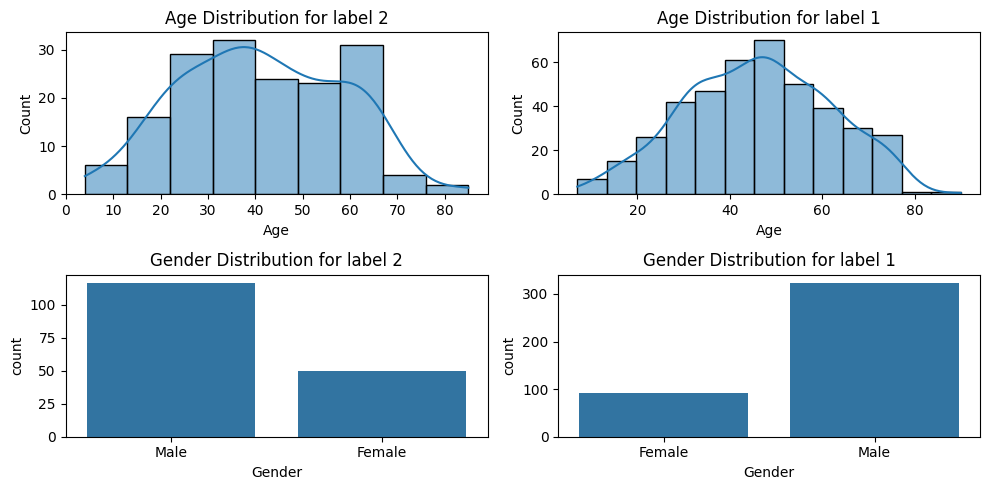

In [17]:
###############################################################################
## TODO: Find the shape of the dataset.                                      ##
###############################################################################
df_shape = df.shape
print(df_shape)

###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
###############################################################################
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ##
###############################################################################
target_counts = df['label'].value_counts()
print("Class distribution:\n", target_counts)

balance_ratio = target_counts.min() / target_counts.max()
print(f"Balance ratio (min class / max class): {balance_ratio:.2f}")

###############################################################################
## TODO: plot the age distirbution and gender distrbution for both group    ##
## of patients.(4 plots)                                                    ##
###############################################################################

label_2 = df[df['label'] == 2]
label_1 = df[df['label'] == 1]

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
sns.histplot(label_2['Age'], kde=True)
plt.title("Age Distribution for label 2")

plt.subplot(2, 2, 2)
sns.histplot(label_1['Age'], kde=True)
plt.title("Age Distribution for label 1")

plt.subplot(2, 2, 3)
sns.countplot(data=label_2, x='Gender')
plt.title("Gender Distribution for label 2")

plt.subplot(2, 2, 4)
sns.countplot(data=label_1, x='Gender')
plt.title("Gender Distribution for label 1")

plt.tight_layout()
plt.show()

##### Question: What do you conclude from the plots?

The Male/Female ratio is equal in both labels but the distribution of age is different in labels and based on the age plot we can assume that the label 1 is for in-dangers and people with age 50 and close to that are more in danger.

#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

In [21]:
################################################################################
## TODO
df_no_outliers = df.copy()

# Apply the IQR method to each column individually
for column in df_no_outliers.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

print("Original dataset shape:", df.shape)
print("Dataset shape after IQR-based outlier removal:", df_no_outliers.shape)

################################################################################


Original dataset shape: (583, 11)
Dataset shape after IQR-based outlier removal: (327, 11)


#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [29]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized.                     ##
################################################################################
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder # for categorical data

df_normalized = df_no_outliers.copy()

numerical_features = df_normalized.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
df_normalized[numerical_features] = scaler.fit_transform(df_normalized[numerical_features])

label_encoder = LabelEncoder()
df_normalized['Gender'] = label_encoder.fit_transform(df_normalized['Gender'])

df_normalized

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,0.753086,0,0.08,0.000000,0.349296,0.086957,0.123077,0.547170,0.463415,0.389313,0.0
3,0.666667,1,0.20,0.230769,0.335211,0.057971,0.153846,0.547170,0.487805,0.465649,0.0
5,0.518519,1,0.52,0.461538,0.408451,0.130435,0.061538,0.698113,0.731707,0.694656,0.0
6,0.271605,0,0.16,0.076923,0.256338,0.086957,0.030769,0.584906,0.512195,0.465649,0.0
7,0.308642,0,0.16,0.153846,0.391549,0.057971,0.015385,0.528302,0.536585,0.541985,0.0
...,...,...,...,...,...,...,...,...,...,...,...
567,0.592593,1,0.88,1.000000,0.529577,0.144928,0.461538,0.396226,0.073171,0.000000,0.0
579,0.444444,1,0.04,0.000000,0.098592,0.362319,0.323077,0.396226,0.439024,0.541985,0.0
580,0.592593,1,0.12,0.076923,0.512676,0.550725,0.600000,0.471698,0.439024,0.465649,0.0
581,0.333333,1,0.32,0.307692,0.340845,0.275362,0.338462,0.547170,0.487805,0.465649,0.0


### SVM

#### spliting data

In [30]:
## TODO Split the data into test and training sets.
from sklearn.model_selection import train_test_split

X = df_normalized.drop('label', axis=1)
y = df_normalized['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (261, 10)
Testing set shape: (66, 10)


### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [33]:
#########################################################################################
## TODO
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print("SVM Model with Default Parameters:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not in Danger", "In Danger"]))
#########################################################################################


SVM Model with Default Parameters:
Accuracy: 0.64
Precision: 0.83
Recall: 0.18
F1 Score: 0.29

Classification Report:
               precision    recall  f1-score   support

Not in Danger       0.62      0.97      0.76        38
    In Danger       0.83      0.18      0.29        28

     accuracy                           0.64        66
    macro avg       0.73      0.58      0.52        66
 weighted avg       0.71      0.64      0.56        66



#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [34]:
from sklearn.model_selection import GridSearchCV

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],    # Kernel coefficient for 'rbf'
    'kernel': ['rbf', 'linear']         # Kernel types
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score on training set:", grid_search.best_score_)

best_svm_model = grid_search.best_estimator_

y_val_pred = best_svm_model.predict(X_val)
print("\nClassification Report on Validation Set:")
print(classification_report(y_val, y_val_pred, target_names=["Not in Danger", "In Danger"]))

y_test_pred = best_svm_model.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=["Not in Danger", "In Danger"]))


Training set shape: (195, 10) (195,)
Validation set shape: (66, 10) (66,)
Testing set shape: (66, 10) (66,)
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........

Train an svm model on the entire training data using the parameters you found in the previous step.

In [35]:
#########################################################################################
## TODO
best_params = grid_search.best_params_

svm_model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

svm_model.fit(X_train_full, y_train_full)

y_test_pred = svm_model.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=["Not in Danger", "In Danger"]))
#########################################################################################


Classification Report on Test Set:
               precision    recall  f1-score   support

Not in Danger       0.59      1.00      0.75        38
    In Danger       1.00      0.07      0.13        28

     accuracy                           0.61        66
    macro avg       0.80      0.54      0.44        66
 weighted avg       0.77      0.61      0.49        66



### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

####True Positives (TP):
Patients predicted to be "in danger" (1) who are actually "in danger" (bottom-right cell).

####True Negatives (TN):
Patients predicted to be "not in danger" (0) who are actually "not in danger" (top-left cell).

####False Positives (FP):
Patients predicted to be "in danger" (1) who are actually "not in danger" (top-right cell).

####False Negatives (FN):
Patients predicted to be "not in danger" (0) who are actually "in danger" (bottom-left cell).

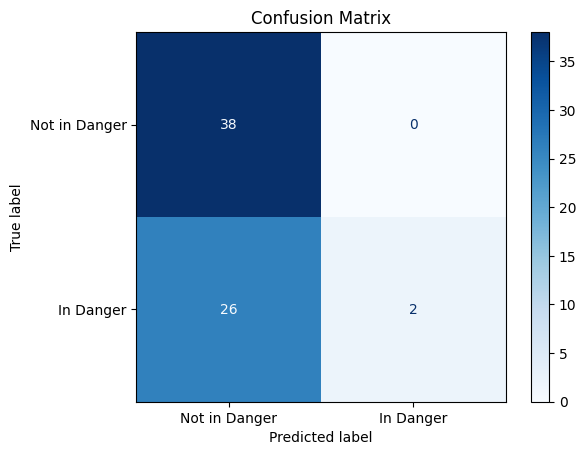

Model Accuracy on Test Set: 0.61


In [36]:
#########################################################################################
## TODO
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Not in Danger", "In Danger"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Calculate and report accuracy on the test set
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Model Accuracy on Test Set: {accuracy:.2f}")
#########################################################################################


Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

SVM Model Performance with Outliers:
               precision    recall  f1-score   support

Not in Danger       0.62      0.97      0.76        38
    In Danger       0.83      0.18      0.29        28

     accuracy                           0.64        66
    macro avg       0.73      0.58      0.52        66
 weighted avg       0.71      0.64      0.56        66


Logistic Regression Model Performance with Outliers:
               precision    recall  f1-score   support

Not in Danger       0.57      0.82      0.67        38
    In Danger       0.42      0.18      0.25        28

     accuracy                           0.55        66
    macro avg       0.50      0.50      0.46        66
 weighted avg       0.51      0.55      0.49        66



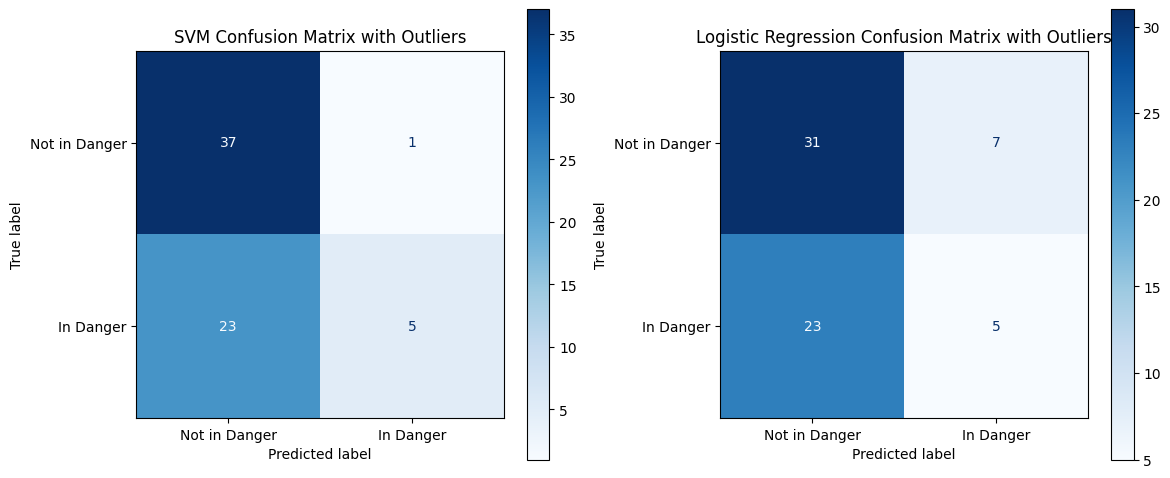

In [37]:
#########################################################################################
## TODO
from sklearn.linear_model import LogisticRegression

df_with_outliers = df_normalized.copy()

np.random.seed(42)
num_outliers = int(0.05 * len(df_with_outliers))  # 5% of the dataset
outlier_indices = np.random.choice(df_with_outliers.index, num_outliers, replace=False)

df_with_outliers.loc[outlier_indices, 'Total_Bilirubin'] = df_with_outliers['Total_Bilirubin'].max() * 10
df_with_outliers.loc[outlier_indices, 'Alkaline_Phosphotase'] = df_with_outliers['Alkaline_Phosphotase'].max() * 10

X_outliers = df_with_outliers.drop('label', axis=1)
y_outliers = df_with_outliers['label']
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_outliers, y_outliers, test_size=0.2, random_state=42)

svm_model_outliers = SVC()
svm_model_outliers.fit(X_train_out, y_train_out)
y_pred_svm_outliers = svm_model_outliers.predict(X_test_out)

log_reg_model_outliers = LogisticRegression(max_iter=1000)
log_reg_model_outliers.fit(X_train_out, y_train_out)
y_pred_log_reg_outliers = log_reg_model_outliers.predict(X_test_out)

# Evaluate both models
print("SVM Model Performance with Outliers:")
print(classification_report(y_test_out, y_pred_svm_outliers, target_names=["Not in Danger", "In Danger"]))

print("\nLogistic Regression Model Performance with Outliers:")
print(classification_report(y_test_out, y_pred_log_reg_outliers, target_names=["Not in Danger", "In Danger"]))

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(svm_model_outliers, X_test_out, y_test_out, display_labels=["Not in Danger", "In Danger"], cmap="Blues", ax=ax[0])
ax[0].set_title("SVM Confusion Matrix with Outliers")

ConfusionMatrixDisplay.from_estimator(log_reg_model_outliers, X_test_out, y_test_out, display_labels=["Not in Danger", "In Danger"], cmap="Blues", ax=ax[1])
ax[1].set_title("Logistic Regression Confusion Matrix with Outliers")

plt.tight_layout()
plt.show()
#########################################################################################
